# 군집화(Clustering) - K-Means Algorithm

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
    

- #### Iris data를 차원 축소

In [49]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
iris = load_iris()
iris_std = scaler.fit_transform(iris.data)

In [51]:
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_std)
iris_pca[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [52]:
df = pd.DataFrame(iris.data, columns=['sl','sw','pl','pw'])
df['PC1'] = iris_pca[:,0]
df['PC2'] = iris_pca[:,1]
df.head()

,sl,sw,pl,pw,PC1,PC2
0,5.1,3.5,1.4,0.2,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,-2.389842,0.646835


- ### K-Means 모델 생성/학습

In [53]:
# 모델 생성
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2021)

In [54]:
# 모델 학습
kmeans.fit(iris_std)

KMeans(n_clusters=3, random_state=2021)

In [55]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [56]:
df['target'] = iris.target
df['cluster'] = kmeans.labels_
df.tail()

,sl,sw,pl,pw,PC1,PC2,target,cluster
145,6.7,3.0,5.2,2.3,1.870503,0.386966,2,0
146,6.3,2.5,5.0,1.9,1.564580,-0.896687,2,2
147,6.5,3.0,5.2,2.0,1.521170,0.269069,2,0
148,6.2,3.4,5.4,2.3,1.372788,1.011254,2,0
149,5.9,3.0,5.1,1.8,0.960656,-0.024332,2,2


In [80]:
df.groupby(['target','cluster']).count()

sl  sw  pl  pw  PC1  PC2
target cluster                          
0      1        50  50  50  50   50   50
1      0        11  11  11  11   11   11
       2        39  39  39  39   39   39
2      0        36  36  36  36   36   36
       2        14  14  14  14   14   14

- ### 데이터 시각화

In [82]:
df.head()

,sl,sw,pl,pw,PC1,PC2,target,cluster
0,5.1,3.5,1.4,0.2,-2.264703,0.480027,0,1
1,4.9,3.0,1.4,0.2,-2.080961,-0.674134,0,1
2,4.7,3.2,1.3,0.2,-2.364229,-0.341908,0,1
3,4.6,3.1,1.5,0.2,-2.299384,-0.597395,0,1
4,5.0,3.6,1.4,0.2,-2.389842,0.646835,0,1


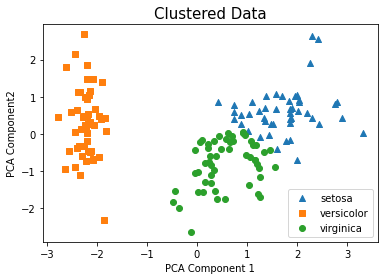

In [112]:
# 군집화한 결과를 차원축소하여 시각화
markers = ['^','s','o']     
for i, marker in enumerate(markers):
    x_axis_data = df[df.cluster == i]['PC1']
    y_axis_data = df[df.cluster == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, 
                label=iris.target_names[i])

plt.legend()
plt.xlabel('PCA Component 1'); plt.ylabel('PCA Component2')
plt.title('Clustered Data', fontsize=15)
plt.show()

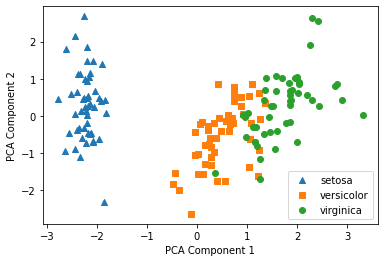

In [113]:
markers = ['^','s','o']     # Setosa-세모 , Versicolor-네모, Virginicca-동그라미

for i, marker in enumerate(markers):
    
    x_axis_data = df[df.target == i]['PC1']
    y_axis_data = df[df.target == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, 
                label=iris.target_names[i])
plt.legend()
plt.xlabel('PCA Component 1'); plt.ylabel('PCA Component 2')
plt.show()
  

- 시각화 두개를 합치기!!


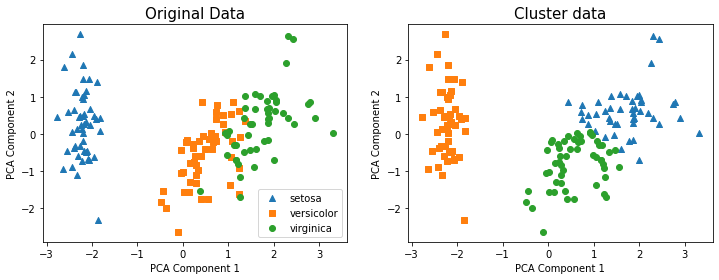

In [131]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
for k, column in enumerate(['target','cluster']):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = df[df[column] == i]['PC1']
        y_axis_data = df[df[column] == i]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker = marker,label=iris.target_names[i] )                       

    if k == 0:          #오리지널 데이터일 경우
        ax.set_title('Original Data', fontsize=15)
        ax.legend()

    else:               # 클러스터 데이터일 경우
        ax.set_title('Cluster data', fontsize=15)
    ax.set_ylabel('PCA Component 2')
    ax.set_xlabel('PCA Component 1')

plt.show()
